In [ ]:
# from google.colab import drive
!7z x data.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 10527833 bytes (11 MiB)

Extracting archive: data.zip
--
Path = data.zip
Type = zip
Physical Size = 10527833
Embedded Stub Size = 4
Total Physical Size = 52470873
Multivolume = +
Volume Index = 2
Volumes = 3

  0%      2% - data.csv                 5% - data.csv                 7% - data.csv                 9% - data.csv                13% - data.csv                17% - data.csv                22% - data.csv                28% - data.csv                34% - data.csv

In [ ]:
# drive.mount('/content/drive')


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# rawData = pd.read_csv('/content/drive/MyDrive/data/data.csv')
rawData = pd.read_csv('data.csv')

#data preprocessing
#removing column 1 and 2(making InfoData)
rawData1_=rawData.iloc[:3616,:]
rawData2_=rawData.iloc[3617:,:]

rawData=pd.concat([rawData1_, rawData2_], ignore_index=True)

infoData = pd.DataFrame()


In [ ]:
rawData.shape


(42371, 1036)

In [ ]:
infoData['FLAG'] = rawData['FLAG']
infoData['CONS_NO'] = rawData['CONS_NO']
data = rawData.drop(['FLAG', 'CONS_NO'], axis=1)   #axis 1 column ,axis 0 row

# print(infoData)

#droping duplicate row
dropIndex = data[data.duplicated() ].index  # duplicates drop

data = data.drop(dropIndex, axis=0)   #droping duplicate value present wen two row are same
infoData = infoData.drop(dropIndex, axis=0) #droping duplicate index infodata

#removing row with all zero(Nan) value
zeroIndex = data[(data.sum(axis=1) == 0)].index  # zero rows drop

# zeroIndex = data[((data == 0).astype(int).sum(axis=1)>600)] #Greater than 600 zero rows drop

zeroIndex1 = (data == 0).astype(int).sum(axis=1)
zeroIndex2 = (data != 0).astype(int).sum(axis=1)

z = pd.DataFrame()

z['z_col']=zeroIndex1
z['nz_col']=zeroIndex2
z['T_col']=z.sum(axis =1)
print(z.isna().sum().sum())
print(z)




# z=pd.merge(zeroIndex1, zeroIndex2,left_index=True,right_index=True)
# df.merge(pd.DataFrame(data = [s.values] * len(s), columns = s.index), left_index=True, right_index=True)
# print(z)


data = data.drop(zeroIndex, axis=0)
infoData = infoData.drop(zeroIndex, axis=0)

#change column name to dates(2014/1/1 to 2014-01-01)
data.columns = pd.to_datetime(data.columns)  #columns reindexing according to dates

#sort data accoding to date( as previusoly column are unsorted)
data = data.reindex(sorted(data.columns), axis=1)
cols = data.columns

# reindex row name (as some row has been remove till this step due to duplicate or all nan values)
data.reset_index(inplace=True, drop=True)  # index sorting
infoData.reset_index(inplace=True, drop=True)

#filling nan value using neighbouring value (middle missing value replace by average
#and other by maximum 2 distance element)
data = data.interpolate(method='linear', limit=7, limit_direction='both', axis=0).fillna(0)
# print("NAN after interpolation")
# print(data.isna().sum().sum())

#removing erronoues value(fixing outliers)
# for i in range(data.shape[0]):  # outliers treatment
#     m = data.loc[i].mean()
#     st = data.loc[i].std()
#     a = False

#     data.loc[i] = data.loc[i].mask(data.loc[i] > (m + 3 * st), other=m + 3 * st)


0
       z_col  nz_col  T_col
0          0    1034   1034
1        304     730   1034
2         41     993   1034
3          0    1034   1034
4          0    1034   1034
...      ...     ...    ...
42366      0    1034   1034
42367     28    1006   1034
42368     49     985   1034
42369      0    1034   1034
42370      0    1034   1034

[41493 rows x 3 columns]


In [ ]:
print(rawData1_.isna().sum().sum())
print(data.isna().sum().sum())
# from google.colab import drive
# drive.mount('/content/drive')

1177003
0


In [ ]:
# !pip install dataframe_image
# rawData1_.head(10)
rawData1_.describe()
# import dataframe_image as dfi
# dfi.export(r1, 'r1.png',chrome_path='/content/drive/r1.png',max_cols=25)


,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,3616.000000,2128.000000,2139.000000,2138.000000,2139.000000,2140.000000,2138.000000,2137.000000,2143.000000,2143.000000,...,3424.000000,3458.000000,3503.000000,3478.000000,3504.000000,3500.000000,3510.000000,3509.000000,3501.000000,3502.000000
mean,0.999723,17.942871,20.593478,18.446413,17.401622,59.164561,18.462834,18.443294,18.391507,15.587881,...,27.125339,29.780399,36.017913,32.788778,36.929949,39.504754,40.668012,39.250271,38.902762,38.100531
std,0.016630,109.785464,129.437971,123.904094,99.129849,2004.846380,109.545179,116.478030,117.612973,91.812913,...,167.038389,184.230457,294.051554,199.881344,315.826223,339.288731,400.062675,349.832949,339.060101,362.497754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.040000,0.155000,0.040000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.787500,3.180000,3.400000,3.340000,3.490000,3.447500,3.522500,3.550000,3.420000,3.600000
50%,1.000000,4.740000,4.900000,4.725000,4.540000,4.440000,4.580000,4.520000,4.330000,4.080000,...,7.880000,8.235000,9.660000,8.760000,10.010000,9.875000,9.870000,9.730000,9.540000,9.375000
75%,1.000000,11.922500,12.150000,11.652500,11.865000,11.512500,11.700000,11.740000,11.440000,10.810000,...,16.630000,17.077500,20.590000,17.930000,22.305000,22.312500,22.080000,21.750000,20.830000,19.762500
max,1.000000,3318.000000,3966.000000,4392.000000,3414.000000,92713.900000,3167.000000,3960.000000,3654.000000,3306.000000,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.000000


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# save preprocessed data without scaling
data.to_csv(r'visualization.csv', index=False, header=True)  # preprocessed data without scaling

#noramalisation process
scale = MinMaxScaler()
scaled = scale.fit_transform(data.values.T).T
mData = pd.DataFrame(data=scaled, columns=data.columns)
preprData = pd.concat([infoData, mData], axis=1, sort=False)  # Back to initial format
print("Noramalised data")

# print(preprData)

# save preprocessed data after scaling
preprData.to_csv(r'preprocessedR.csv', index=False, header=True)

Noramalised data


In [ ]:
rawData = pd.read_csv('preprocessedR.csv')

# Setting the target and dropping the unnecessary columns
y = rawData[['FLAG']]
X = rawData.drop(['FLAG', 'CONS_NO'], axis=1)

# plt.scatter(X,y , s=50)
# plt.show()

# New Section

In [ ]:
pwd

'/content'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from imblearn import over_sampling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, \
    precision_recall_fscore_support, roc_auc_score, roc_curve
from keras import Sequential

# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LeakyReLU,PReLU,ELU
# from keras.layers import Dropout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, Conv1D, Flatten, Conv2D
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

tf.random.set_seed(1234)
epochs_number = 40  # number of epochs for the neural networks
test_set_size = 0.2  # percentage of the test size comparing to the whole dataset
oversampling_flag = 1  # set to 1 to over-sample the minority class
oversampling_percentage = 0.2  # percentage of the minority class after the oversampling comparing to majority class





# Definition of functions
def read_data():
    rawData = pd.read_csv('preprocessedR.csv')

    # Setting the target and dropping the unnecessary columns
    y = rawData[['FLAG']]
    X = rawData.drop(['FLAG', 'CONS_NO'], axis=1)
    # print(X)
    # DF11 = pd.DataFrame(X)
    # DF11.to_csv('d.csv')
    print('Normal Consumers:                    ', y[y['FLAG'] == 0].count()[0])
    print('Consumers with Fraud:                ', y[y['FLAG'] == 1].count()[0])
    print('Total Consumers:                     ', y.shape[0])
    print("Classification assuming no fraud:     %.2f" % (y[y['FLAG'] == 0].count()[0] / y.shape[0] * 100), "%")

    # columns reindexing according to dates
    X.columns = pd.to_datetime(X.columns)
    X = X.reindex(X.columns, axis=1)

    # Splitting the dataset into training set and test set
    # X_train, X_test, y_train, y_test = train_test_split(X, y['FLAG'], test_size=test_set_size, random_state=0)
    # print("Test set assuming no fraud:           %.2f" % (y_test[y_test == 0].count() / y_test.shape[0] * 100), "%\n")

    # Oversampling of minority class to encounter the imbalanced learning
    # if oversampling_flag == 1:
        # from imblearn.combine import SMOTETomek
        # smtom = SMOTETomek(random_state=139)
        # X_train, y_train = smtom.fit_resample(X_train, y_train)

        # from imblearn.combine import SMOTEENN
        # SMOTEENN = SMOTEENN()
        # X_train, y_train = SMOTEENN.fit_resample(X_train, y_train)

        # from imblearn.over_sampling import KMeansSMOTE
        # sm = KMeansSMOTE(random_state=42,cluster_balance_threshold=0.08)
        # X_train, y_train = sm.fit_resample(X_train, y_train)

        # over = SMOTE(sampling_strategy=oversampling_percentage, random_state=0)
        # X_train, y_train = over.fit_resample(X_train, y_train)

        # print("Oversampling statistics in training set: ")
        # print('Normal Consumers:                    ', y_train[y_train == 0].count())
        # print('Consumers with Fraud:                ', y_train[y_train == 1].count())
        # print("Total Consumers                      ", X_train.shape[0])

    # if oversampling_flag_st == 1:
    #   from imblearn.combine import SMOTETomek

    #   counter = Counter(y_train)
    #   print('Before',counter)
      # oversampling the train dataset using SMOTE + Tomek
      # smtom = SMOTETomek(random_state=139)
      # X_train, y_train = smtom.fit_resample(X_train, y_train)

    #   counter = Counter(y_train_smtom)
    #   print('After',counter)

    return X_train, X_test, y_train, y_test


def results(y_test, prediction):
    print("Accuracy", 100 * accuracy_score(y_test, prediction))
    print("RMSE:", mean_squared_error(y_test, prediction, squared=False))
    print("MAE:", mean_absolute_error(y_test, prediction))
    print("F1:", 100 * precision_recall_fscore_support(y_test, prediction)[2])
    print("AUC:", 100 * roc_auc_score(y_test, prediction))
    print(confusion_matrix(y_test, prediction), "\n")

    from sklearn.metrics import roc_curve, auc

    fpr, tpr, threshold = roc_curve(y_test, prediction)
    auc = auc(fpr, tpr)

    plt.figure(figsize=(5, 5), dpi=100)

    plt.plot(fpr, tpr, marker='.', label='Logistic (auc = %0.3f)' % auc)

    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')

    plt.legend()

    plt.show()


def ANN(X_train, X_test, y_train, y_test):
    print('Artificial Neural Network:')
    # for i in range(4,100,3):
    #     print("Epoch:",i)

    # Model creation
    model = Sequential()
    model.add(Dense(1000, input_dim=1034, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

    # model.fit(X_train, y_train, validation_split=0, epochs=i, shuffle=True, verbose=0)
    model.fit(X_train, y_train, validation_split=0, epochs=epochs_number, shuffle=True, verbose=1)
    # DF1 = pd.DataFrame(X_test)
    # DF1.to_csv("data2.csv")
    prediction = model.predict(X_test)
    # DF = pd.DataFrame(prediction)
    # DF.to_csv("data1.csv")
    prediction = (prediction>0.5) #for convertion of pridected value into true(1) or false(0)


#     pred=[]
# # for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
#     pred.append(pd.Series(model.predict(X_test)[:,1]))
#     final_prediction=pd.concat(pred,axis=1).mean(axis=1)
#     print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

#     pd.concat(pred,axis=1)

#     pd.concat(pred,axis=1)

#     fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
#     thresholds

#     from sklearn.metrics import accuracy_score
#     accuracy_ls = []
#     for thres in thresholds:
#         y_pred = np.where(final_prediction>thres,1,0)
#         accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))

#     accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
#                             axis=1)
#     accuracy_ls.columns = ['thresholds', 'accuracy']
#     accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
#     accuracy_ls.head()

#     accuracy_ls

#     def plot_roc_curve(fpr, tpr):
#         plt.plot(fpr, tpr, color='orange', label='ROC')
#         plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.title('Receiver Operating Characteristic (ROC) Curve')
#         plt.legend()
#         plt.show()
#     plot_roc_curve(fpr,tpr)



    model.summary()
    results(y_test, prediction)




def CNN1D(X_train, X_test, y_train, y_test):
    print('1D - Convolutional Neural Network:')

    # Transforming the dataset into tensors
    X_train = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)

    # Model creation
    model = Sequential()
    model.add(Conv1D(100, kernel_size=2, input_shape=(1034, 1), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

    # return model
    # model.fit(X_train, y_train, epochs=1, validation_split=0.1, shuffle=False, verbose=1)
    model.fit(X_train, y_train, epochs=epochs_number, validation_split=0, shuffle=False, verbose=1)
    # prediction = model.predict_classes(X_test)
    prediction = model.predict(X_test)
    # (prediction==True).to_csv(r'prediction.csv')
    print(prediction)
    # prediction.describe()
    prediction = (prediction<0.6)



    model.summary()
    results(y_test, prediction)




def LR(X_train, X_test, y_train, y_test):
    print('Logistic Regression:')
    '''
    # Parameters selection
    param_grid = {'C': [0.1,1,10,100],'solver': ['newton-cg', 'lbfgs']}
    grid = GridSearchCV(LogisticRegression(max_iter=1000,random_state=0), param_grid=param_grid, n_jobs=-1)
    grid.fit(X_train, y_train)
    df = pd.DataFrame(grid.cv_results_)
    print(df[['param_C', 'param_solver', 'mean_test_score', 'rank_test_score']])
    '''
    model = LogisticRegression(C=1000, max_iter=1000, n_jobs=-1, solver='newton-cg')
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    results(y_test, prediction)


def DT(X_train, X_test, y_train, y_test):
    print('Decision Tree:')
    model = DecisionTreeClassifier(random_state=0)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    results(y_test, prediction)


def RF(X_train, X_test, y_train, y_test):
    print('Random Forest:')
    '''
    # Parameters selection
    param_grid = {'n_estimators':[10,100,1000]}
    grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=param_grid, n_jobs=-1)
    grid.fit(X_train, y_train)
    df = pd.DataFrame(grid.cv_results_)
    print(df[['param_criterion', 'mean_test_score', 'rank_test_score']])
    '''

    # model = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, max_features='auto',  # max_depth=10,
                                  #  random_state=0, n_jobs=-1)
    rf = RandomForestClassifier(n_estimators=15,random_state=0,criterion='gini',min_samples_split=7)
    rf.fit(X_train, y_train)
    # model.fit(X_train, y_train)
    # prediction = model.predict(X_test)
    prediction = rf.predict(X_test)
    results(y_test, prediction)


def SVM(X_train, X_test, y_train, y_test):
    # model = SVC(random_state=0)
    # model.fit(X_train, y_train)
    # prediction = model.predict(X_test)
    # results(y_test, prediction)
    # svm = SVC( random_state=0,gamma = 0.1, kernel='rbf',C=1,probability=True)
    svm = SVC()
    svm.fit(X_train, y_train)
    prediction = svm.predict(X_test)
    results(y_test, prediction)
    # return prediction
def gbdt(X_train, X_test, y_train, y_test):
    model = GradientBoostingClassifier(n_estimators=180, max_depth=9, learning_rate=0.01)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    results(y_test, prediction)


# ----Main----
# X_train, X_test, y_train, y_test = read_data()

# Uncomment any model to test
# ANN(X_train, X_test, y_train, y_test)
# CNN1D(X_train, X_test, y_train, y_test)
# RF(X_train, X_test, y_train, y_test)
# LR(X_train, X_test, y_train, y_test)
# DT(X_train, X_test, y_train, y_test)
# SVM(X_train, X_test, y_train, y_test)
# gbdt(X_train, X_test, y_train, y_test)


# prediction = SVM(X_train, X_test, y_train, y_test)
# type(prediction)

In [ ]:
# DF11 = pd.DataFrame(y_test)
# DF11.to_csv("data3.csv")
# RF(X_train, X_test, y_train, y_test)
# LR(X_train, X_test, y_train, y_test)
# DT(X_train, X_test, y_train, y_test)
# SVM(X_train, X_test, y_train, y_test)
# gbdt(X_train, X_test, y_train, y_test)

In [ ]:
# pred=[]
# # for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
# pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
# final_prediction=pd.concat(pred,axis=1).mean(axis=1)
# print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

# pd.concat(pred,axis=1)

# pd.concat(pred,axis=1)

# fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
# thresholds

# from sklearn.metrics import accuracy_score
# accuracy_ls = []
# for thres in thresholds:
#     y_pred = np.where(final_prediction>thres,1,0)
#     accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))

# accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
#                         axis=1)
# accuracy_ls.columns = ['thresholds', 'accuracy']
# accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
# accuracy_ls.head()

# accuracy_ls

# def plot_roc_curve(fpr, tpr):
#     plt.plot(fpr, tpr, color='orange', label='ROC')
#     plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend()
#     plt.show()
# plot_roc_curve(fpr,tpr)

In [ ]:
# DF = pd.DataFrame(prediction)
# DF.to_csv("data1.csv")
# DF1.to_excel("data1.csv")

In [ ]:
def Combined(X_train, X_test, y_train, y_test):
  print('2D - Convolution Neural Network:')
  # Transforming every row of the train set into a 2D array and then into a tensor
  n_array_X_train = X_train.to_numpy()
  n_array_X_train_extended = np.hstack((n_array_X_train, np.zeros((n_array_X_train.shape[0],2)))) # adding two empty columns in order to make the number of columns
  # an exact multiple of 7
  week = []
  for i in range(n_array_X_train_extended.shape[0]):
    a = np.reshape(n_array_X_train_extended[i], (-1, 7, 1))
    week.append(a)
  X_train_reshaped = np.array(week)
  # Transforming every row of the train set into a 2D array and then into a tensor
  n_array_X_test = X_test.to_numpy() #X_test to 2D - array
  n_array_X_train_extended = np.hstack((n_array_X_test, np.zeros((n_array_X_test.shape[0], 2))))
  week2 = []
  for i in range(n_array_X_train_extended.shape[0]):
    b=np.reshape(n_array_X_train_extended[i], (-1, 7, 1))
    week2.append(b)
  X_test_reshaped = np.array(week2)
  input_shape = (1, 148, 7, 1) #input shape of the tensor# Model creation
  model1 = Sequential()
  model1.add(Conv2D(kernel_size = (7, 3), filters =32,input_shape=input_shape[1:], activation= 'relu', data_format='channels_last'))
  model1.add(Flatten())
  model1.add(Dense(100, activation='relu'))
  model1.add(Dense(100, activation='relu'))
  model1.add(Dense(64, activation='relu'))
  model1.add(Dense(1, activation='relu'))
  model1.compile(loss=keras.losses.binary_crossentropy,optimizer='adam' ,metrics = ['accuracy'])
  # return model2
  model1.fit(X_train_reshaped, y_train, validation_split=0.1, epochs=epochs_number, shuffle=False, verbose=1)
  prediction1 = model1.predict(X_test_reshaped)
  # prediction1 = (prediction1>0.5)
  print(prediction1)
  print('1D - convolution Neural Network:')
  # Transforming the dataset into tensors
  X_train = X_train.to_numpy().reshape(X_train.shape[0],X_train.shape[1], 1)
  X_test = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)
  #Model creation
  model2 = Sequential()
  model2.add(Conv1D(100, kernel_size = 7, input_shape=(1034, 1), activation= 'relu'))
  model2.add(Flatten())
  model2.add(Dense(100, activation='relu'))
  model2.add(Dense(100, activation='relu'))
  model2.add(Dense(64, activation='relu'))
  model2.add(Dense(1, activation='sigmoid'))
  model2.compile(loss=keras.losses.binary_crossentropy,optimizer='adam' ,metrics = ['accuracy'])
  model2.fit(X_train, y_train, validation_split=0,epochs=epochs_number, shuffle=False, verbose=1)
  prediction2 = model2.predict(X_test)
  # prediction2 = (prediction2>0.5)
  return prediction1 ,prediction2



def deep_and_wideCNN(prediction1, prediction2):
  n= len(prediction2)
  for i in range(n) :
    if(prediction1[i]!=prediction2[i]):
      prediction1[i]=0
  # prediction1 = (prediction1>0)
  results(y_test , prediction1)

# prediction1, prediction2 =Combined(X_train, X_test, y_train, y_test)
# deep_and_wideCNN(prediction1 , prediction2)

In [ ]:
from pandas.core.common import random_state
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



rawData = pd.read_csv('preprocessedR.csv')

# Setting the target and dropping the unnecessary columns
y = rawData[['FLAG']]
X = rawData.drop(['FLAG', 'CONS_NO'], axis=1)
# print(X)
# DF11 = pd.DataFrame(X)
# DF11.to_csv('d.csv')
print('Normal Consumers:                    ', y[y['FLAG'] == 0].count()[0])
print('Consumers with Fraud:                ', y[y['FLAG'] == 1].count()[0])
print('Total Consumers:                     ', y.shape[0])
print("Classification assuming no fraud:     %.2f" % (y[y['FLAG'] == 0].count()[0] / y.shape[0] * 100), "%")

# columns reindexing according to dates
X.columns = pd.to_datetime(X.columns)
X = X.reindex(X.columns, axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y['FLAG'], test_size=0.2, random_state=0)

# train , val_train , test , val_test =train_test_split(X, y['FLAG'],test_size = .50 , random_state =30)
# x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state =30)

from imblearn.combine import SMOTETomek
# smtom = SMOTETomek(random_state=139)
# X, y['FLAG'] = smtom.fit_resample(X, y['FLAG'])
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import TomekLinks
# from imblearn.under_sampling import NearMiss
# nm1 = NearMiss(version=1)
# X_resampled_nm1, y_resampled = nm1.fit_resample(X, y)

from imblearn.over_sampling import ADASYN
#  sm = ADASYN()
#  X, y = sm.fit_sample(X, y)



# from imblearn.over_sampling import KMeansSMOTE
# sm = KMeansSMOTE(random_state=42,cluster_balance_threshold=0.04)
# X, y['FLAG'] = sm.fit_resample(X, y['FLAG'])



train , xval_test , test , yval_test =train_test_split(X, y['FLAG'],test_size = .20 , random_state =30)

print("Oversampling statistics in training set: ")
print('Normal Consumers:                    ',test[test == 0].count())
print('Consumers with Fraud:                ', test[test == 1].count())
print("Total Consumers                      ", train.shape[0])

sm = ADASYN(random_state=42)
# us = TomekLinks()

train, test = sm.fit_resample(train, test)
# train, test = us.fit_resample(train, test)

print("Oversampling statistics in training set: ")
print('Normal Consumers:                    ', test[test == 0].count())
print('Consumers with Fraud:                ', test[test == 1].count())
print("Total Consumers                      ", train.shape[0])

x_train1, x_train2, y_train1, y_train2 = train_test_split(train, test, test_size=0.5, random_state =30)


# from imblearn.combine import SMOTETomek
# smtom = SMOTETomek(random_state=139)
# x_train11, y_train11 = smtom.fit_resample(x_train1, y_train1)

# smtom1 = SMOTETomek(random_state=139)
# x_train22, y_train22 = smtom1.fit_resample(x_train2, y_train2)

Normal Consumers:                     36676
Consumers with Fraud:                 3579
Total Consumers:                      40255
Classification assuming no fraud:     91.11 %
Oversampling statistics in training set: 
Normal Consumers:                     29326
Consumers with Fraud:                 2878
Total Consumers                       32204


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


Oversampling statistics in training set: 
Normal Consumers:                     29326
Consumers with Fraud:                 29340
Total Consumers                       58666


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# # rf = RandomForestClassifier(n_estimators=15 , criterion='gini', min_samples_split=7,min_samples_leaf=5)
# rf1 = RandomForestRegressor(n_estimators=15,max_depth=7)
# rf1.fit(train,test)

# rf2 = RandomForestRegressor(n_estimators=15,max_depth=7)
# rf2.fit(x_train1,y_train1)



In [ ]:
# rf1_pred = rf1.predict(xval_test)
# rf1_pred_=rf1_pred>0.5
# results(yval_test,rf1_pred_)

# rf2_pred = rf2.predict(xval_test)
# rf2_pred_=rf2_pred>0.5
# results(yval_test,rf2_pred_)

In [ ]:
# knn = KNeighborsRegressor(weights= 'distance', n_neighbors= 27, algorithm= 'ball_tree')
# knn.fit(x_train1,y_train1)
# dt = DecisionTreeClassifier(random_state=0)
# dt.fit(x_train1,y_train1)

In [ ]:
knn = KNeighborsRegressor()
knn.fit(x_train1,y_train1)
# dt = DecisionTreeClassifier(random_state=0,criterion='gini', min_samples_split=7,min_samples_leaf=5)
# dt.fit(x_train1,y_train1)



from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestClassifier(n_estimators=15 , criterion='gini', min_samples_split=7,min_samples_leaf=5)
rf = RandomForestRegressor(n_estimators=15,max_depth=7)
rf.fit(x_train1,y_train1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(max_depth=7, n_estimators=15)

In [ ]:
# print(x_train)
# print(y_train)

In [ ]:
# rf.score(x_test,y_test)

In [ ]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# lr.fit(x_train1,y_train1)

In [ ]:
# lr.score(x_test,y_test)

In [ ]:
svr = SVR()
svr = SVR()
svr.fit(x_train1,y_train1)

# svr.score(x_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


SVR()

In [ ]:
# svc = SVC( random_state=0,gamma = 0.1, kernel='rbf',C=1,probability=True)
# svc.fit(x_train,y_train)
# from sklearn.ensemble import GradientBoostingRegressor
# gbdt = GradientBoostingRegressor(n_estimators=180, max_depth=9, learning_rate=0.01)
# gbdt = GradientBoostingRegressor()
# gbdt.fit(x_train1,y_train1)


# gbdt.score(x_test,y_test)

In [ ]:
# svc.score(x_test,y_test)

In [ ]:
# gbdt.score(x_test,y_test)

In [ ]:
# prediction_knn = knn.predict(x_train2)
# prediction_lr = lr.predict(x_train2)

# prediction_rf = rf.predict(x_train2)
# prediction_svc = svr.predict(x_train2)
# prediction_gbdt = gbdt.predict(x_train2)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


Accuracy 66.87007806906897
RMSE: 0.575585979076376
MAE: 0.33129921930931033
F1: [50.60988006 75.07566043]
AUC: 66.9297812534053
[[ 4979  9714]
 [    4 14636]] 



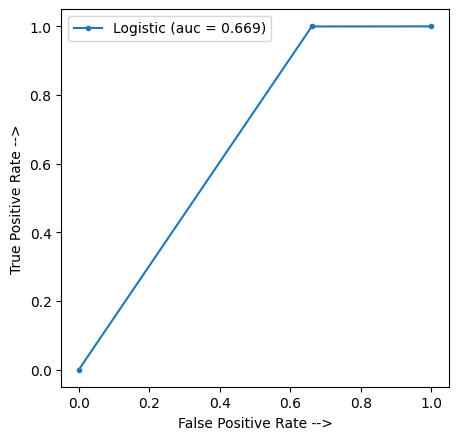

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


Accuracy 75.85654382436164
RMSE: 0.49135991061174655
MAE: 0.2414345617563836
F1: [73.78008145 77.62825373]
AUC: 75.87110061145805
[[ 9964  4729]
 [ 2353 12287]] 



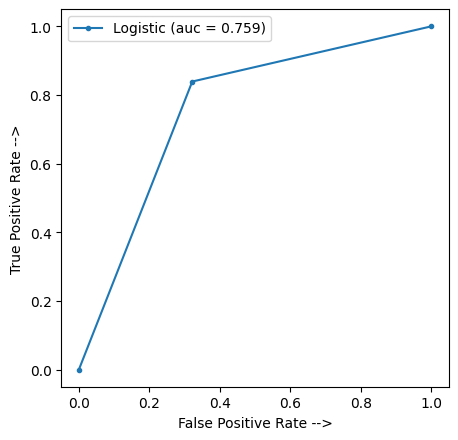

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


Accuracy 94.94426073023557
RMSE: 0.22484971135770732
MAE: 0.05055739269764429
F1: [94.77540955 95.10253955]
AUC: 94.95041015218949
[[13451  1242]
 [  241 14399]] 



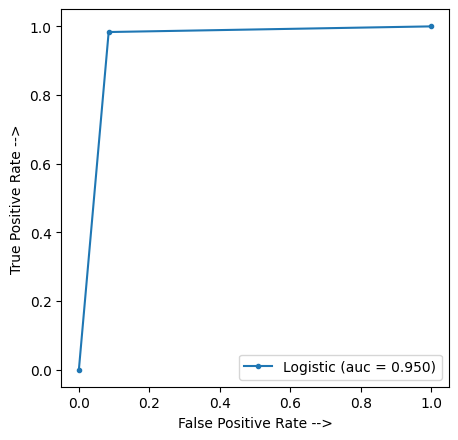

In [ ]:
prediction_knn = knn.predict(x_train2)
pred1 = prediction_knn>0.5
results(y_train2 , pred1)

prediction_rf = rf.predict(x_train2)
pred2 = prediction_rf>0.5
results(y_train2,pred2)

prediction_svr = svr.predict(x_train2)
pred3 = (prediction_svr>0.5)
results(y_train2 , pred3)

input3 = np.column_stack((prediction_knn,prediction_rf,prediction_svr))
# input3 = np.column_stack((prediction_rf, prediction_svc, prediction_gbdt))
# output = val_test
output = y_train2

In [ ]:
# for i in range(5,100,5):
#   pred2 = (prediction_rf>i/100)
#   results(yval_test , pred2)

In [ ]:
# rf = RandomForestClassifier()
# rf.fit(input3,output)

# pred1 = prediction_knn>0.6
# results(y_train2 , pred1)
# prediction_knn = knn.predict(xval_test)
# pred1 = prediction_knn>0.5
# results(yval_test , pred1)

# prediction_rf = rf.predict(xval_test)
# pred2 = prediction_rf>0.5
# results(yval_test,pred2)

# prediction_svr = svr.predict(xval_test)
# pred3 = (prediction_svr>0.5)
# results(yval_test , pred3)

In [ ]:
# df = pd.DataFrame(input3)
# df.to_csv("input3.csv")
# pred3 = (prediction_svr>0.5)
# results(yval_test , pred3)

#removing erronoues value(fixing outliers)
# for i in range(input3.shape[0]):  # outliers treatment
#     m = input3.loc[i].mean()
#     st = input3.loc[i].std()

#     output.loc[i] = output.loc[i].mask(data.loc[i] > (m + 3 * st), other=m + 3 * st)
#     input3.loc[i] = input3.loc[i].mask(data.loc[i] > (m + 3 * st), other=m + 3 * st)

In [ ]:
print('Artificial Neural Network:')
    # for i in range(4,100,3):
    #     print("Epoch:",i)

    # Model creation
model = Sequential()
model.add(Dense(1000, input_dim=1034, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])


model.fit(input3,output, validation_split=0, epochs=15, shuffle=True, verbose=1)

# prediction = (prediction>0.5) #for convertion of pridected value into true(1) or false(0)


# model.summary()
# results(yval_test, prediction)

Artificial Neural Network:
Epoch 1/50
917/917 [==============================] - 6s 4ms/step - loss: 0.1145 - accuracy: 0.9576
Epoch 2/50
917/917 [==============================] - 4s 4ms/step - loss: 0.0969 - accuracy: 0.9662
Epoch 3/50
917/917 [==============================] - 5s 5ms/step - loss: 0.0972 - accuracy: 0.9661
Epoch 4/50
917/917 [==============================] - 4s 4ms/step - loss: 0.0957 - accuracy: 0.9661
Epoch 5/50
917/917 [==============================] - 3s 4ms/step - loss: 0.0960 - accuracy: 0.9662
Epoch 6/50
917/917 [==============================] - 3s 4ms/step - loss: 0.0949 - accuracy: 0.9663
Epoch 7/50
917/917 [==============================] - 5s 6ms/step - loss: 0.0933 - accuracy: 0.9670
Epoch 8/50
917/917 [==============================] - 3s 4ms/step - loss: 0.0940 - accuracy: 0.9662
Epoch 9/50
917/917 [==============================] - 3s 4ms/step - loss: 0.0932 - accuracy: 0.9675
Epoch 10/50
917/917 [==============================] - 5s 6ms/step - loss

In [ ]:
knn_output = knn.predict(xval_test)
rf_output = rf.predict(xval_test)
svr_output = svr.predict(xval_test)
output_stack1 = np.column_stack((knn_output,rf_output,svr_output))

# rf.score(x_test,y_test)
# knn_output = knn.predict(xval_test)
# lr_output = lr.predict(xval_test)
# output_stack1 = np.column_stack((knn_output,lr_output))
# rf_output = rf.predict(output_stack1)
# results(yval_test , rf_output)

# rf_output = rf.predict(xval_test)
# svm_output = svr.predict(xval_test)
# gbdt_output = gbdt.predict(xval_test)
# output_stack1 = np.column_stack((rf_output,svm_output,gbdt_output))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


Accuracy 38.628741771208546
RMSE: 0.7833980994921513
MAE: 0.6137125822879146
F1: [50.13623978 20.21637332]
AUC: 61.54845847040671
[[2484 4866]
 [  75  626]] 



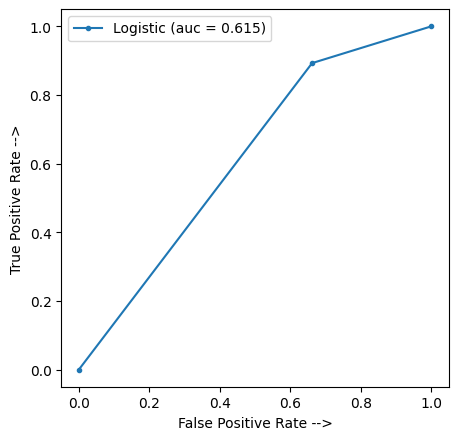

Accuracy 67.80524158489628
RMSE: 0.5674042510865046
MAE: 0.32194758415103714
F1: [79.51959545 24.78235636]
AUC: 64.6877832445389
[[5032 2318]
 [ 274  427]] 



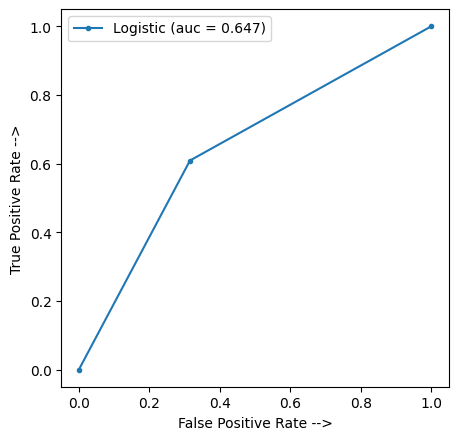

Accuracy 88.08843621910322
RMSE: 0.34513133414537694
MAE: 0.11911563780896783
F1: [93.33333333 44.14676762]
AUC: 72.69947693770803
[[6713  637]
 [ 322  379]] 



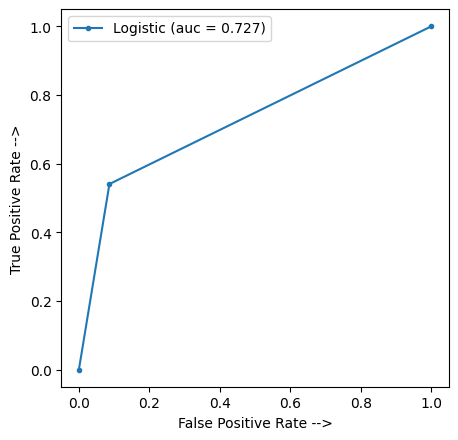

In [ ]:
# results(yval_test , rf_output)

pred1 = knn_output>0.5
results(yval_test , pred1)


pred2 = rf_output>0.5
results(yval_test,pred2)


pred3 = (svr_output>0.5)
results(yval_test , pred3)

252/252 [==============================] - 0s 2ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (None, 1000)             4000      
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 100)              100100    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 100)              10100     
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 100)              10100     
 pper)                                                           
                                                                 
 

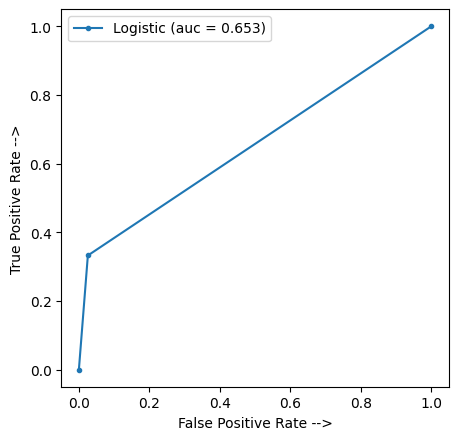

In [ ]:
prediction1 = model.predict(output_stack1)

prediction = (prediction1>0.5)

model.summary()
results(yval_test, prediction)

# model.score(output_stack1, y_test)

Accuracy 10.508011427151907
RMSE: 0.9460020537654666
MAE: 0.8949198857284809
F1: [ 3.86924616 16.28906704]
AUC: 50.986394557823125
[[ 145 7205]
 [   0  701]] 



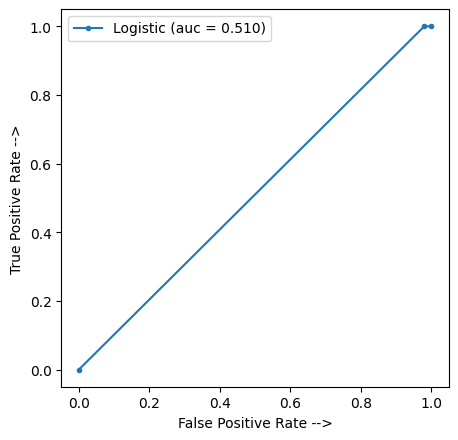

Accuracy 79.4187057508384
RMSE: 0.45366611344866387
MAE: 0.20581294249161594
F1: [87.68487551 37.40083113]
AUC: 75.43595640824091
[[5899 1451]
 [ 206  495]] 



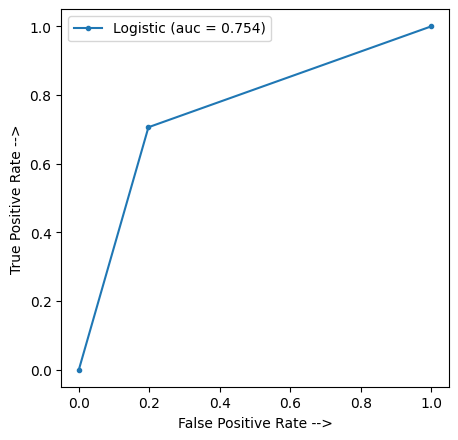

Accuracy 84.08893305179481
RMSE: 0.3988867878008144
MAE: 0.1591106694820519
F1: [90.79543005 41.37299771]
AUC: 75.21924946868906
[[6318 1032]
 [ 249  452]] 



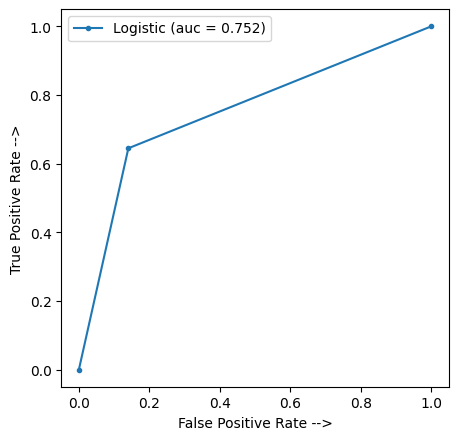

Accuracy 86.07626381815923
RMSE: 0.37314522885655077
MAE: 0.13923736181840765
F1: [92.07045342 42.95165394]
AUC: 74.37196619018506
[[6508  842]
 [ 279  422]] 



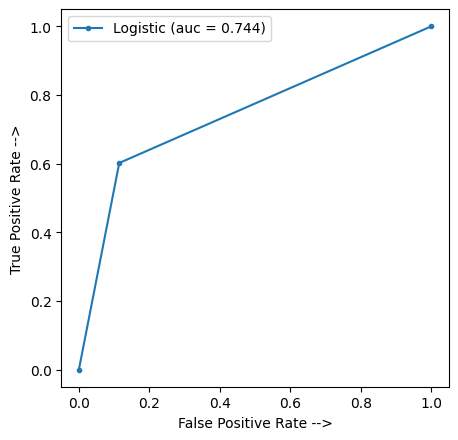

Accuracy 87.19413737423922
RMSE: 0.3578527997062588
MAE: 0.12805862625760775
F1: [92.77454622 43.75340971]
AUC: 73.62920803128668
[[6619  731]
 [ 300  401]] 



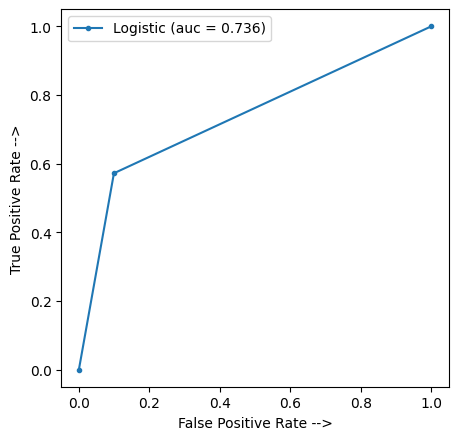

Accuracy 88.29959011302944
RMSE: 0.34205861905484214
MAE: 0.11700409886970563
F1: [93.45105673 45.16880093]
AUC: 73.39583879200752
[[6721  629]
 [ 313  388]] 



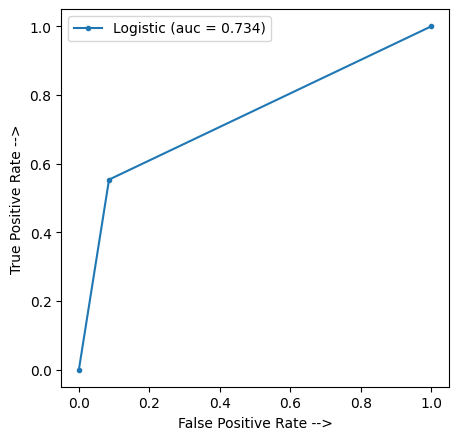

Accuracy 88.92063097751833
RMSE: 0.3328568614657309
MAE: 0.11079369022481679
F1: [93.83637369 45.27607362]
AUC: 72.51001969974867
[[6790  560]
 [ 332  369]] 



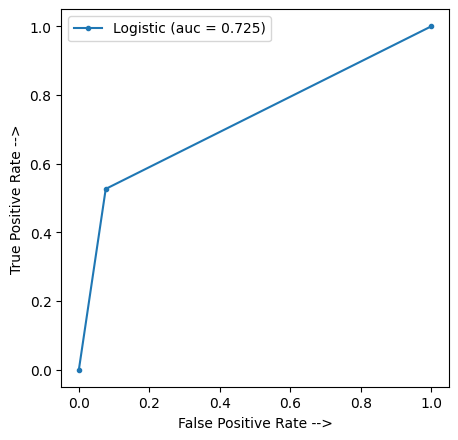

Accuracy 89.51683020742765
RMSE: 0.3237772350331683
MAE: 0.10483169792572351
F1: [94.19452469 46.03580563]
AUC: 72.25583471619747
[[6847  503]
 [ 341  360]] 



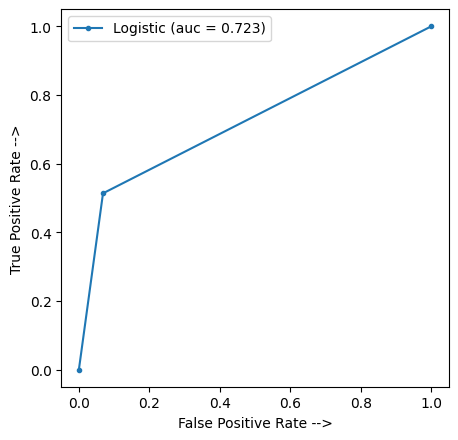

Accuracy 89.86461309154143
RMSE: 0.31836122421643276
MAE: 0.10135386908458577
F1: [94.40559441 46.17414248]
AUC: 71.8010713557891
[[6885  465]
 [ 351  350]] 



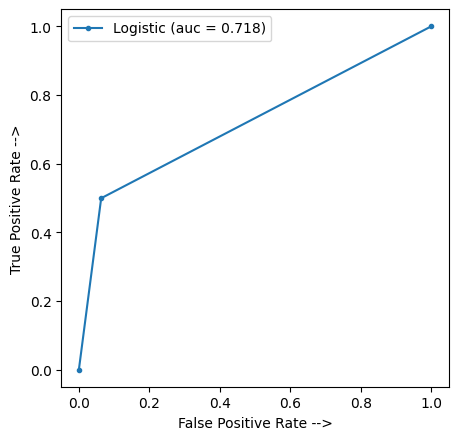

Accuracy 90.01366289901875
RMSE: 0.31601166277498755
MAE: 0.09986337100981245
F1: [94.49842617 45.96774194]
AUC: 71.3665123681427
[[6905  445]
 [ 359  342]] 



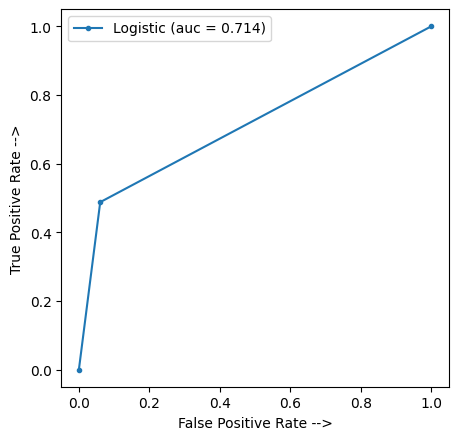

Accuracy 90.13787107191654
RMSE: 0.3140402669735757
MAE: 0.09862128928083468
F1: [94.57724355 45.61643836]
AUC: 70.85382398323095
[[6924  426]
 [ 368  333]] 



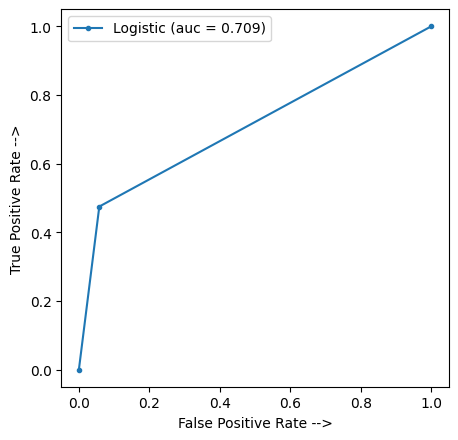

Accuracy 90.29934169668364
RMSE: 0.31145879829146517
MAE: 0.09700658303316358
F1: [94.67512102 45.57491289]
AUC: 70.55511562684988
[[6943  407]
 [ 374  327]] 



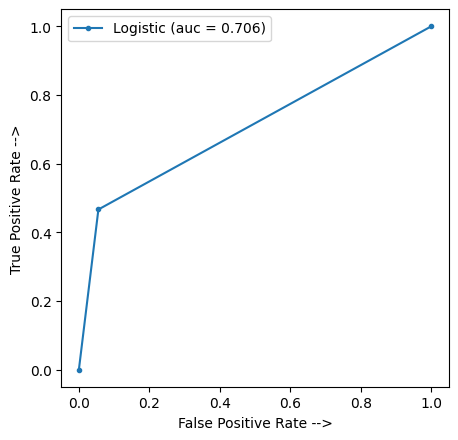

Accuracy 90.49807477332008
RMSE: 0.30825192986711236
MAE: 0.09501925226679915
F1: [94.79131204 45.93639576]
AUC: 70.53491125408793
[[6961  389]
 [ 376  325]] 



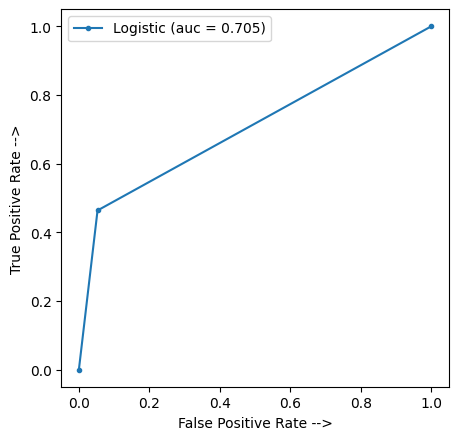

Accuracy 90.64712458079741
RMSE: 0.3058247115457249
MAE: 0.09352875419202583
F1: [94.8834681  45.63176895]
AUC: 70.03582831135307
[[6982  368]
 [ 385  316]] 



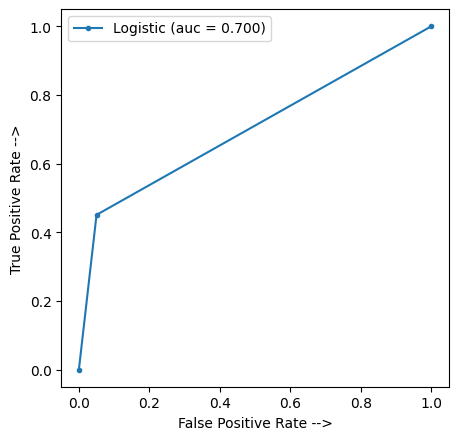

Accuracy 90.84585765743385
RMSE: 0.30255813230792755
MAE: 0.0915414234256614
F1: [95.00440588 45.36693847]
AUC: 69.4994322978835
[[7008  342]
 [ 395  306]] 



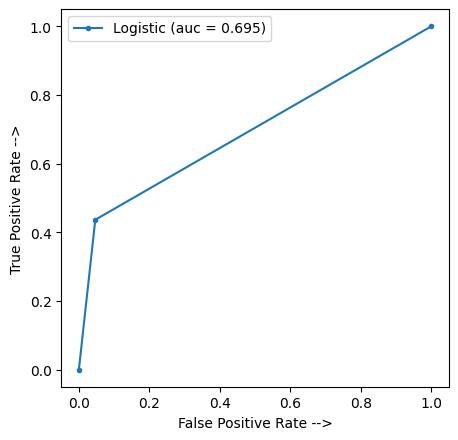

Accuracy 91.00732828220097
RMSE: 0.29987783709035637
MAE: 0.0899267171779903
F1: [95.10016243 45.39969834]
AUC: 69.26524789659089
[[7026  324]
 [ 400  301]] 



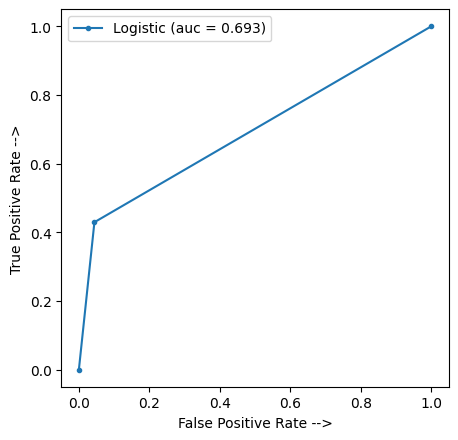

Accuracy 91.14395727238852
RMSE: 0.2975910403155894
MAE: 0.08856042727611477
F1: [95.17884914 45.69687738]
AUC: 69.27555387347522
[[7038  312]
 [ 401  300]] 



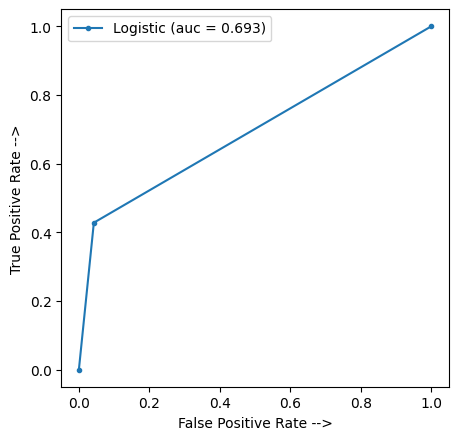

Accuracy 91.2060613588374
RMSE: 0.29654575770296543
MAE: 0.08793938641162588
F1: [95.2181548  45.37037037]
AUC: 68.92242374838666
[[7049  301]
 [ 407  294]] 



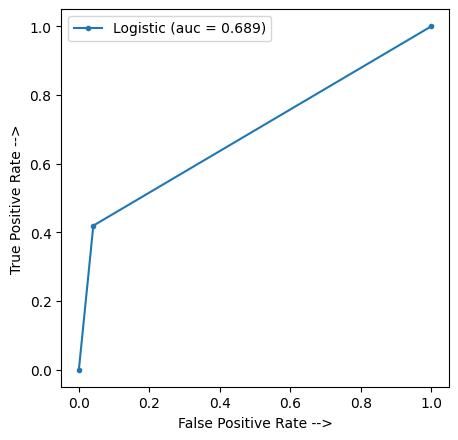

Accuracy 91.31784871444542
RMSE: 0.29465490468605116
MAE: 0.0868215128555459
F1: [95.28689906 45.00393391]
AUC: 68.46745659747494
[[7066  284]
 [ 415  286]] 



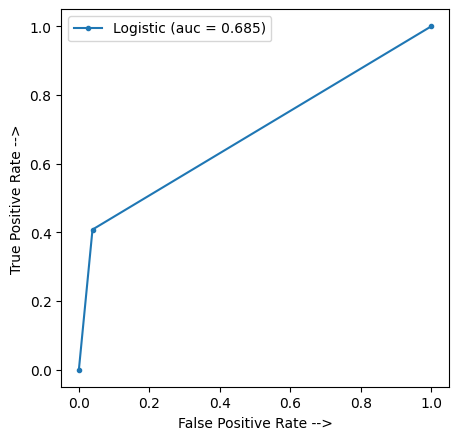

Accuracy 91.3799528008943
RMSE: 0.2935991689209236
MAE: 0.08620047199105701
F1: [95.32785782 44.39102564]
AUC: 67.92075460712103
[[7080  270]
 [ 424  277]] 



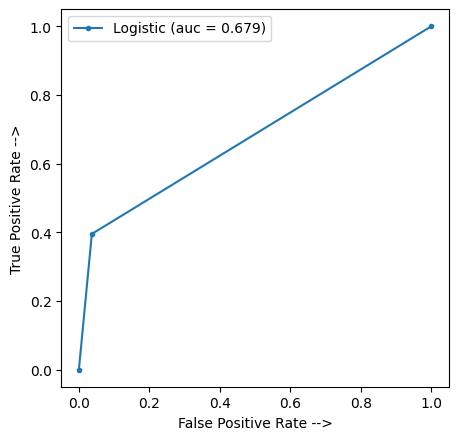

In [ ]:
for i in range(0,40,2):
  prediction = prediction1>i/100
  results(yval_test, prediction)

In [ ]:
1/10

0.1

In [ ]:
# for i in range(len(prediction)):
#   if(prediction[i]==True):
#      prediction[i]=1
#   else:
#      prediction[i]=0
# results(yval_test,prediction )

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# grid_pram = {
#     'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25,27,29],
#     'weights': ['uniform','distance'],
#     'algorithm': ['ball_tree','kd_tree']
# }


In [ ]:
# grid_ccp = RandomizedSearchCV(estimator=knn ,param_distributions = grid_pram, cv = 5 , n_jobs=-1)
#

In [ ]:
# grid_ccp.fit(xval_test,yval_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                                        17, 19, 21, 23, 25, 27,
                                                        29],
                                        'weights': ['uniform', 'distance']})

In [ ]:
# grid_ccp.best_params_

{'weights': 'uniform', 'n_neighbors': 25, 'algorithm': 'kd_tree'}

In [ ]:
# knn = KNeighborsClassifier()
# knn.fit(x_train,y_test)

# knn.score(x_train,y_train)

# svc = SVC()
# svc.fit(X_train,y_train)

# svc.score(x_train, y_test)

# predcition_knn = knn.predict(val_train)
# predcition_svm = svc.predict(val_train)

# np.cloumn_stack

In [ ]:
# !pip install mlxtend
# import six
# import sys
# sys.modules['sklearn.externals.six'] = six


# def ml_and_dl(X_train, X_test, y_train, y_test):

#   from sklearn.ensemble import RandomForestClassifier
#   from sklearn.svm import LinearSVC
#   from sklearn.linear_model import LogisticRegression
#   # from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
#   from sklearn.ensemble import GradientBoostingClassifier
# #   from sklearn.pipeline import make_pipeline
# #   from sklearn.ensemble import StackingClassifier
#   from mlxtend.classifier import StackingClassifier
# #   # estimators = [
# #   #     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
# #   #     ('svr', make_pipeline(
# #   #                           LinearSVC(random_state=42)))]



#   # svm = SVC(random_state=0)
#   svm = SVC()      # gamma= 1.0/sigma
#   lr = LogisticRegression(C=1000, max_iter=1000, n_jobs=-1, solver='newton-cg')
#   # dt = DecisionTreeClassifier(random_state=0,criterion='guni',sample_splits=7,sample_leaves=5)
#   # rf = RandomForestClassifier(random_state=0,criterion='guni',min_samples_split=7)

#   # gbdt = GradientBoostingClassifier(n_estimators=180, max_depth=9, learning_rate=0.001)
#   # lr = LogisticRegression(C=1000, max_iter=1000, n_jobs=-1, solver='newton-cg')
#   ann = Sequential()
#   ann.add(Dense(1000, input_dim=1034, activation='relu'))
#   ann.add(Dense(100, activation='relu'))
#   ann.add(Dense(100, activation='relu'))
#   ann.add(Dense(100, activation='relu'))
#   ann.add(Dense(10, activation='relu'))
#   ann.add(Dense(1, activation='sigmoid'))

#   ann.compile(loss=keras.losses.binary_crossentropy,
#                   optimizer='adam',
#                   metrics=['accuracy'])

# #   ann=ann1()
# #   clf = StackingClassifier(estimators=[svm,dt,lr], final_estimator=lr)
#   clf = StackingClassifier(classifiers=[lr,svm],
#                           use_probas=True,
#                           average_probas=False,
#                           meta_classifier=ann)
#   clf.fit(X_train, y_train)

#   prediction = clf.predict(X_test)
#   prediction = (prediction>0.5) #for convertion of pridected value into true(1) or false(0)
#   # clf.summary()
#   results(y_test, prediction)

# # ml_and_dl(X_train, X_test, y_train, y_test)

Text(0, 0.5, 'Consumption')

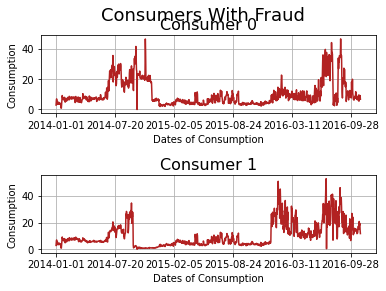

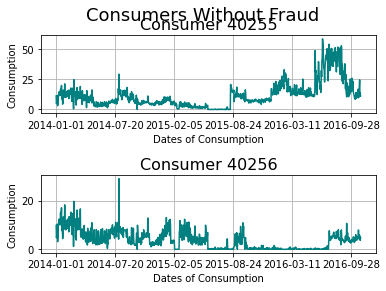

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

rawData1 = pd.read_csv('visualization.csv', nrows=3) #taking first 3 rows
cols = rawData1.columns
rawData2 = pd.read_csv('visualization.csv', skiprows=187) #removing first 189 rows
rawData2.columns = cols
data = pd.concat([rawData1, rawData2], ignore_index=True) #ignore_index=True to make row index number
                                            #continuous((0,1)+(0,1) ->form(0,1,0,1) to->(0,1,2,3))

#plot 1D graph for consumer
fig, axs = plt.subplots(2, 1)
fig.suptitle('Consumers With Fraud', fontsize=18)
plt.subplots_adjust(hspace=0.8)


data.loc[0].plot(ax=axs[0], color='firebrick', grid=True)
axs[0].set_title('Consumer 0', fontsize=16)
axs[0].set_xlabel('Dates of Consumption')
axs[0].set_ylabel('Consumption')

data.loc[2].plot(ax=axs[1], color='firebrick', grid=True)
axs[1].set_title('Consumer 1', fontsize=16)
axs[1].set_xlabel('Dates of Consumption')
axs[1].set_ylabel('Consumption')

fig, axs = plt.subplots(2, 1)
fig.suptitle('Consumers Without Fraud', fontsize=18)
plt.subplots_adjust(hspace=0.8)

data.loc[3].plot(ax=axs[0], color='teal', grid=True)
axs[0].set_title('Consumer 40255', fontsize=16)
axs[0].set_xlabel('Dates of Consumption')
axs[0].set_ylabel('Consumption')

data.loc[4].plot(ax=axs[1], color='teal', grid=True)
axs[1].set_title('Consumer 40256', fontsize=16)
axs[1].set_xlabel('Dates of Consumption')
axs[1].set_ylabel('Consumption')



Text(0, 0.5, 'Values')

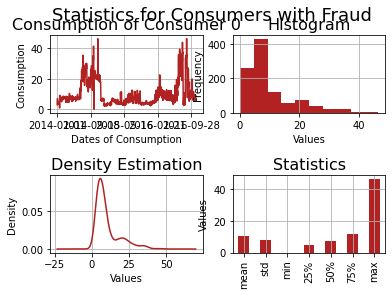

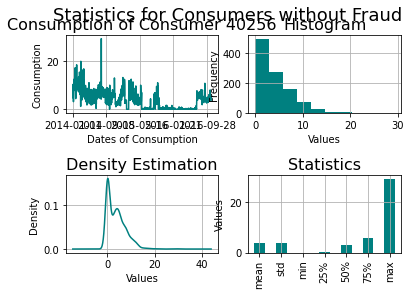

In [ ]:
#statistics for consumer
#with fraud
fig2, axs2 = plt.subplots(2, 2)
fig2.suptitle('Statistics for Consumers with Fraud', fontsize=18)
plt.subplots_adjust(hspace=0.8)

data.loc[0].plot(ax=axs2[0, 0], color='firebrick', grid=True)
axs2[0, 0].set_title('Consumption of Consumer 0', fontsize=16)
axs2[0, 0].set_xlabel('Dates of Consumption')
axs2[0, 0].set_ylabel('Consumption')

data.loc[0].hist(color='firebrick', ax=axs2[0, 1], grid=True)
axs2[0, 1].set_title('Histogram', fontsize=16)
axs2[0, 1].set_xlabel('Values')
axs2[0, 1].set_ylabel('Frequency')

data.loc[0].plot.kde(color='firebrick', ax=axs2[1, 0], grid=True)
axs2[1, 0].set_title('Density Estimation', fontsize=16)
axs2[1, 0].set_xlabel('Values')
axs2[1, 0].set_ylabel('Density')

data.loc[0].describe().drop(['count']).plot(kind='bar', ax=axs2[1, 1], color='firebrick', grid=True)
axs2[1, 1].set_title('Statistics', fontsize=16)
axs2[1, 1].set_ylabel('Values')

#without fraud
fig3, axs3 = plt.subplots(2, 2)
fig3.suptitle('Statistics for Consumers without Fraud', fontsize=18)
plt.subplots_adjust(hspace=0.8)
data.loc[4].plot(ax=axs3[0, 0], color='teal', grid=True)
axs3[0, 0].set_title('Consumption of Consumer 40256', fontsize=16)
axs3[0, 0].set_xlabel('Dates of Consumption')
axs3[0, 0].set_ylabel('Consumption')

data.loc[4].hist(color='teal', ax=axs3[0, 1])
axs3[0, 1].set_title('Histogram', fontsize=16)
axs3[0, 1].set_xlabel('Values')
axs3[0, 1].set_ylabel('Frequency')

data.loc[4].plot.kde(color='teal', ax=axs3[1, 0], grid=True)
axs3[1, 0].set_title('Density Estimation', fontsize=16)
axs3[1, 0].set_xlabel('Values')
axs3[1, 0].set_ylabel('Density')

data.loc[4].describe().drop(['count']).plot(kind='bar', ax=axs3[1, 1], color='teal', grid=True)
axs3[1, 1].set_title('Statistics', fontsize=16)
axs3[1, 1].set_ylabel('Values')



